In [ ]:
!pip install tensorflow

In [5]:
# Import libraries
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
from google.colab import files
uploaded = files.upload()



Saving diabetes_012_health_indicators_BRFSS2015.csv.zip to diabetes_012_health_indicators_BRFSS2015.csv.zip


In [7]:
import pandas as pd
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv.zip")  # Use the correct filename
df.head()



,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [8]:
print(df.isnull().sum())  # Check for missing values


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [9]:
df = df.dropna()  # Drop missing values


In [10]:
X = df.iloc[:, 1:].values  # Features (all columns except first)
y = df.iloc[:, 0].values   # Target (first column)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [12]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y)  # Convert to one-hot encoding if it's a classification problem


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dropout(0.3),  # Dropout for regularization
    Dense(y.shape[1], activation='softmax')  # Output layer (adjust for your problem)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Change to 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,587 (14.01 KB)

 Trainable params: 3,587 (14.01 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8400 - loss: 0.4305 - val_accuracy: 0.8500 - val_loss: 0.3932
Epoch 2/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8492 - loss: 0.3965 - val_accuracy: 0.8501 - val_loss: 0.3930
Epoch 3/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8479 - loss: 0.4000 - val_accuracy: 0.8505 - val_loss: 0.3911
Epoch 4/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8475 - loss: 0.3979 - val_accuracy: 0.8497 - val_loss: 0.3931
Epoch 5/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8474 - loss: 0.3972 - val_accuracy: 0.8509 - val_loss: 0.3906
Epoch 6/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8478 - loss: 0.3980 - val_accuracy: 0.8499 - val_loss: 0.3914
Epoch 7/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8481 - loss: 0.3947 - val_accuracy: 0.8509 - val_loss: 0.3910
Epoch 8/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8499 - loss: 0

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


1586/1586 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8507 - loss: 0.3905
Test Accuracy: 0.8502


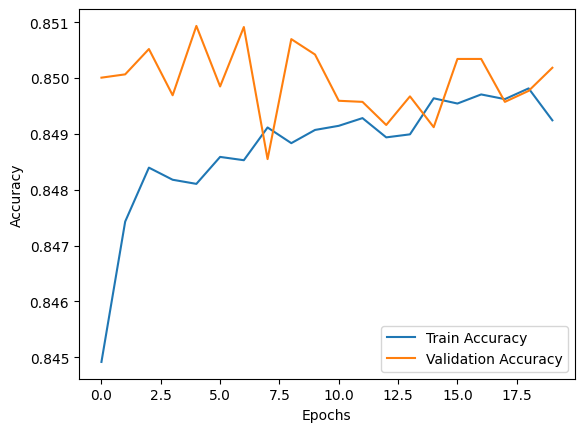

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [1]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


In [18]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to build model
def build_model(hp):
    model = Sequential()

    # Input Layer
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=128, step=32),
                    activation='relu', input_shape=(X.shape[1],)))

    # Hidden Layers
    for i in range(hp.Int('num_layers', 1, 3)):  # 1 to 3 hidden layers
        model.add(Dense(hp.Int(f'units_{i+2}', min_value=32, max_value=128, step=32),
                        activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i+2}', min_value=0.2, max_value=0.5, step=0.1)))  # Dropout

    # Output Layer
    model.add(Dense(y.shape[1], activation='softmax'))  # Adjust activation for classification

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss='categorical_crossentropy',  # Adjust for binary classification if needed
        metrics=['accuracy']
    )

    return model


In [23]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of models to try
    executions_per_trial=1,
    directory='tuning',
    project_name='diabetes_nn'
)

tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")


Trial 5 Complete [00h 07m 40s]
val_accuracy: 0.851190447807312

Best val_accuracy So Far: 0.8515649437904358
Total elapsed time: 00h 34m 24s
Best Hyperparameters: {'units_1': 128, 'num_layers': 1, 'units_2': 64, 'dropout_2': 0.30000000000000004, 'learning_rate': 0.0001, 'units_3': 96, 'dropout_3': 0.30000000000000004}


In [24]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X.shape[1],)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(y.shape[1], activation='softmax')
])


In [25]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
